## Observations and Insights 

In [1]:
 %matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_results_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combine_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
combine_results_df["Mouse ID"].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_df = combine_results_df[combine_results_df[["Mouse ID", "Timepoint"]].duplicated() == True]

duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = combine_results_df[combine_results_df[["Mouse ID", "Timepoint"]].duplicated(keep="last") == True]

duplicate_mice_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_df = combine_results_df[combine_results_df["Mouse ID"] != 'g989']

In [7]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_df["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_stats_df = cleaned_mouse_df.groupby("Drug Regimen")

mean_tv = summary_stats_df["Tumor Volume (mm3)"].mean()

median_tv = summary_stats_df["Tumor Volume (mm3)"].median()

var_tv = summary_stats_df["Tumor Volume (mm3)"].var()

std_tv = summary_stats_df["Tumor Volume (mm3)"].std()

sem_tv = summary_stats_df["Tumor Volume (mm3)"].sem()

summary_stats_df = pd.DataFrame({"Mean Tumor Volume": mean_tv,
                                "Median Tumor Volume": median_tv,
                                "Variance in Tumor Volume": var_tv,
                                "Standard Deviation of Tumor Volume": std_tv,
                                "SEM of Tumor Volume":sem_tv})

summary_stats_df["Mean Tumor Volume"] = summary_stats_df["Mean Tumor Volume"].map("{0:,.2f}mm3".format)
summary_stats_df["Median Tumor Volume"] = summary_stats_df["Median Tumor Volume"].map("{0:,.2f}mm3".format)
summary_stats_df["Variance in Tumor Volume"] = summary_stats_df["Variance in Tumor Volume"].map("{0:,.2f}mm3".format)
summary_stats_df["Standard Deviation of Tumor Volume"] = summary_stats_df["Standard Deviation of Tumor Volume"].map("{0:,.2f}mm3".format)
summary_stats_df["SEM of Tumor Volume"] = summary_stats_df["SEM of Tumor Volume"].map("{0:,.2f}mm3".format)

summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Variance in Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68mm3,41.56mm3,24.95mm3,4.99mm3,0.33mm3
Ceftamin,52.59mm3,51.78mm3,39.29mm3,6.27mm3,0.47mm3
Infubinol,52.88mm3,51.82mm3,43.13mm3,6.57mm3,0.49mm3
Ketapril,55.24mm3,53.70mm3,68.55mm3,8.28mm3,0.60mm3
Naftisol,54.33mm3,52.51mm3,66.17mm3,8.13mm3,0.60mm3
Placebo,54.03mm3,52.29mm3,61.17mm3,7.82mm3,0.58mm3
Propriva,52.32mm3,50.45mm3,43.85mm3,6.62mm3,0.54mm3
Ramicane,40.22mm3,40.67mm3,23.49mm3,4.85mm3,0.32mm3
Stelasyn,54.23mm3,52.43mm3,59.45mm3,7.71mm3,0.57mm3


## Bar and Pie Charts

<IPython.core.display.Javascript object>


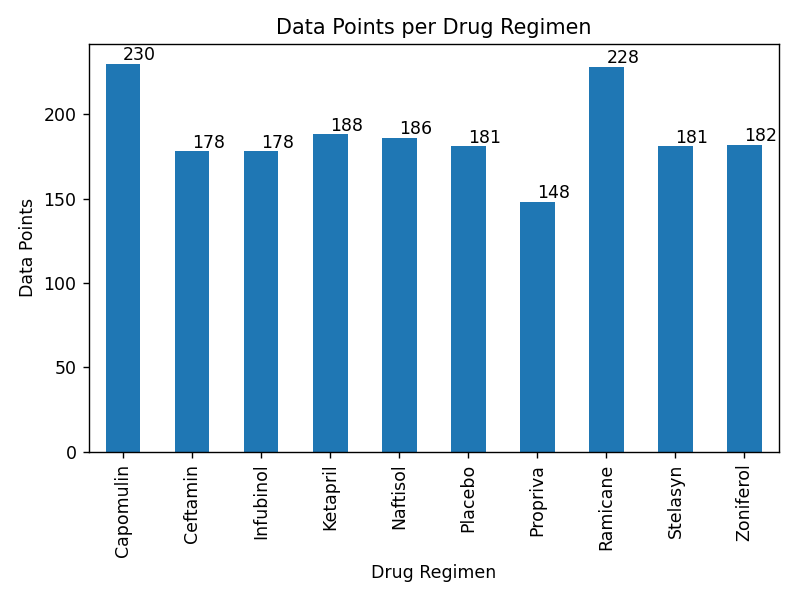

In [9]:

mice_data_pts = cleaned_mouse_df.groupby("Drug Regimen")['Timepoint'].count()

mice_data_pts_bar = mice_data_pts.plot.bar(title="Data Points per Drug Regimen")

for index,value in enumerate(mice_data_pts):
    mice_data_pts_bar.annotate(value,(index, value), xytext=(0,2),textcoords='offset points')

plt.ylabel("Data Points")
plt.tight_layout()

<IPython.core.display.Javascript object>


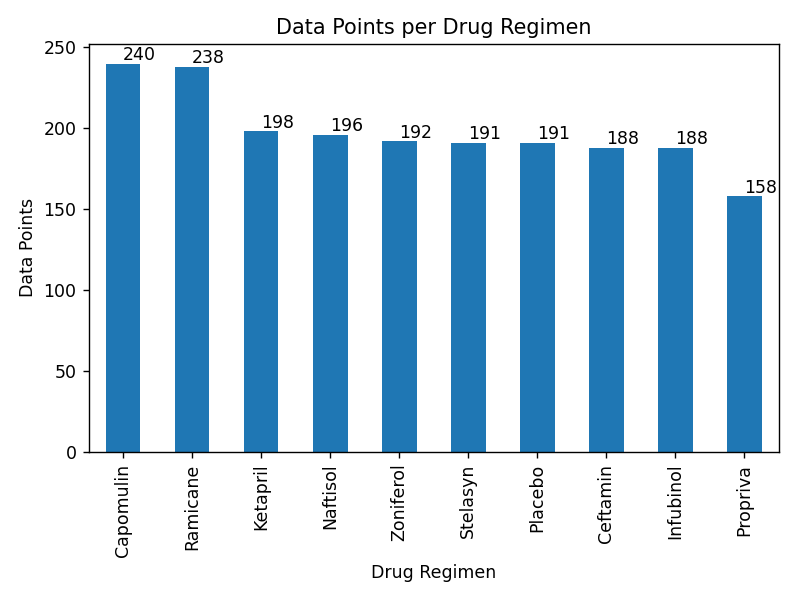

In [18]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

drug_data = cleaned_mouse_df["Drug Regimen"].value_counts()
mouse_data = cleaned_mouse_df["Timepoint"].nunique()

mouse_regimen = drug_data.add(mouse_data, fill_value=0)

mouse_plot = mouse_regimen.plot(kind="bar")
#plt.bar(drug_data, mouse_data)
for index,value in enumerate(mouse_regimen):
    mouse_plot.annotate(value,(index, value), xytext=(0,2),textcoords='offset points')


plt.title("Data Points per Drug Regimen")
plt.ylabel("Data Points")
plt.xlabel("Drug Regimen")

plt.tight_layout()

<IPython.core.display.Javascript object>


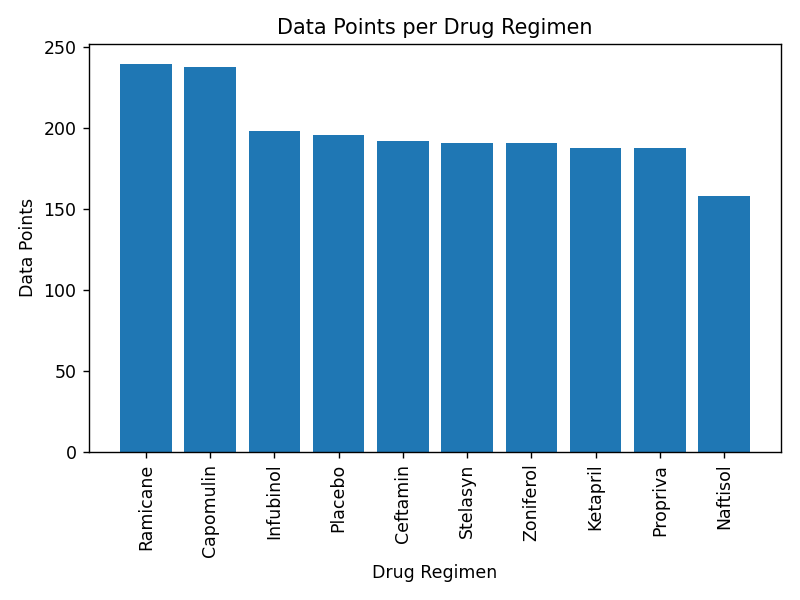

0
240
1
238
2
198
3
196
4
192
5
191
6
191
7
188
8
188
9
158


In [21]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

drug_data = cleaned_mouse_df["Drug Regimen"].value_counts()
mouse_data_pts = cleaned_mouse_df["Timepoint"].nunique()
drug_names = cleaned_mouse_df["Drug Regimen"].unique()
mouse_regimen = drug_data.add(mouse_data_pts, fill_value=0)

mouse_plot = plt.bar(drug_names, mouse_regimen, align="center")

for index,value in enumerate(mouse_regimen):
    print(index,value, sep="\n")
    #mouse_plot.annotate(value,(index, value), xytext=(0,2),textcoords='offset points')

plt.xticks(rotation=90)
plt.title("Data Points per Drug Regimen")
plt.ylabel("Data Points")
plt.xlabel("Drug Regimen")

plt.tight_layout()

plt.show()



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male_mouse = cleaned_mouse_df.loc[cleaned_mouse_df["Sex"]=="Male", "Mouse ID"].nunique()
female_mouse = cleaned_mouse_df.loc[cleaned_mouse_df["Sex"]=="Female", "Mouse ID"].nunique()

sex_dist_df = pd.DataFrame ({"Female vs Male": [female_mouse, male_mouse]},
                           index=["Female","Male"])

colors = ["red", "blue"]
plot = sex_dist_df.plot.pie(y="Female vs Male", figsize=(5,5), colors=colors, autopct="%1.1f%%")

plt.title("Sex Distribution Chart")


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_dist = [cleaned_mouse_df.loc[cleaned_mouse_df["Sex"]=="Male", "Mouse ID"].nunique(), cleaned_mouse_df.loc[cleaned_mouse_df["Sex"]=="Female", "Mouse ID"].nunique()]
sex = ["Male", "Female"]
colors = ["blue", "red"]

plt.pie(sex_dist, labels=sex, colors=colors, autopct="%1.1f%%")

plt.title("Sex Distribution Chart")


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
